In [1]:
from pyagamo.objectives import RE36
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.algorithms.soo.nonconvex.es import ES
from pyagamo.players import Algorithm_pymoo
from pyagamo import AGAMO
import time
import matplotlib.pyplot as plt

In [2]:
max_eval = 10000
npop = 25
change_iter = 1
next_iter = -1
max_front = 100
player_parm = { "nclone": 15, "mutate_args": [0.45, 0.9, 0.01], 'sup': 0.0}

In [3]:
objs = [RE36(i, obj=i+1) for i in range(3)]
players = [Algorithm_pymoo(i, npop, DE) for i in range(3)]

In [4]:
agamo = AGAMO(max_eval, change_iter, next_iter, max_front)
agamo.add_objectives(objs)
agamo.add_players(players)
agamo.init()

In [5]:
agamo.start_optimize()
res=agamo.get_results()
agamo.close()

10020.0eval [00:08, 1236.94eval/s]                        


In [6]:
res

{'stop_flag': True,
 'front': array([[21.30394381, 20.1837477 , 55.64923874, 52.37364002],
        [12.4676516 , 15.69695936, 35.0072902 , 37.52294064],
        [12.4676516 , 12.99960716, 35.0072902 , 30.87913384],
        [12.4676516 , 12.47045423, 29.17762871, 27.58298325],
        [12.4676516 , 12.99960716, 24.95481784, 22.98679237],
        [12.4676516 , 12.99960716, 24.68136471, 19.60043674],
        [12.72049315, 12.80979151, 18.96790799, 24.12962855],
        [12.72049315, 12.80979151, 18.96790799, 22.742602  ],
        [12.72049315, 12.80979151, 18.96790799, 21.86134024],
        [12.72049315, 12.90469933, 18.96790799, 21.05237851],
        [12.72049315, 12.17520586, 18.96790799, 18.83395423],
        [13.93296771, 12.02695568, 17.79002751, 18.58256217],
        [16.85027435, 12.02695568, 17.79002751, 15.19620655]]),
 'front_eval': array([[2.33333333e-03, 5.56492387e+01, 0.00000000e+00],
        [3.91666667e-03, 3.75229406e+01, 0.00000000e+00],
        [2.41282051e-02, 3.500729

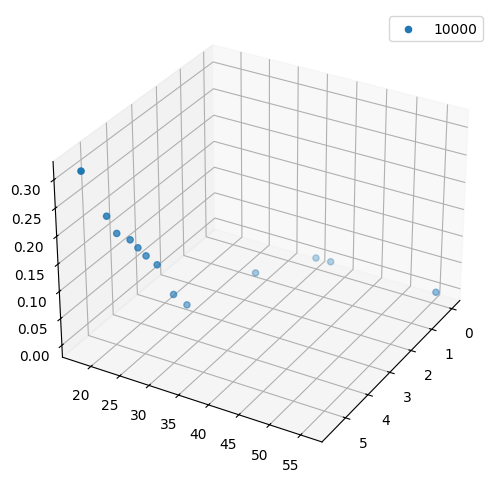

In [7]:
ax = plt.figure('Front Pareto', figsize=(6, 6)).add_subplot(111, projection='3d')
front_eval = res['front_eval']
ax.scatter(front_eval[:, 0], front_eval[:, 1], front_eval[:, 2], marker='o', label=str(max_eval))
ax.grid(True)
ax.view_init(30, 30)
plt.legend()
plt.show()

In [8]:
agamo = AGAMO(max_eval, change_iter, next_iter, max_front)
agamo.add_objectives(objs)
agamo.add_players(players)
agamo.init()

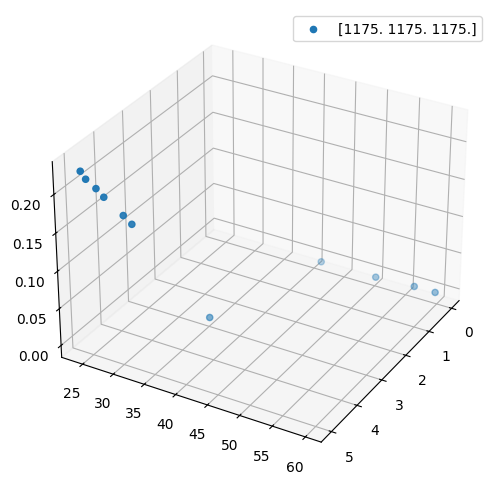

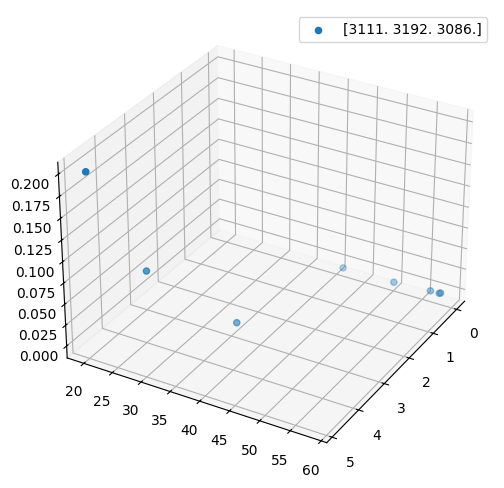

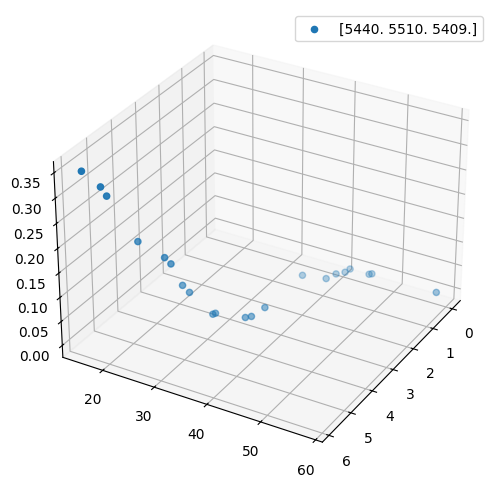

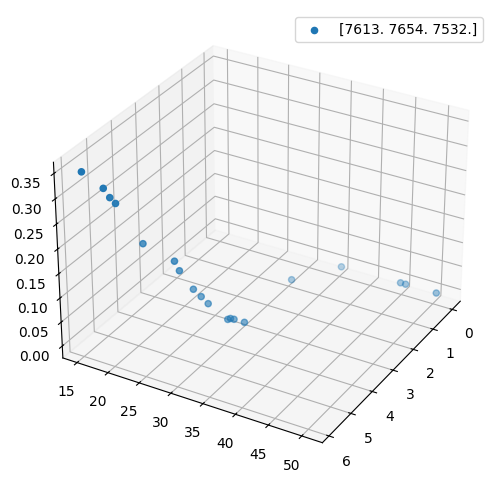

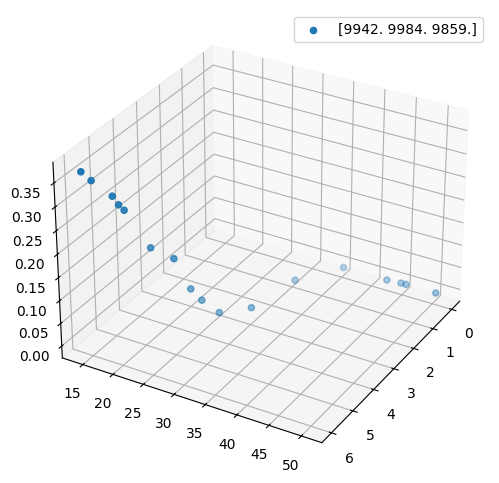

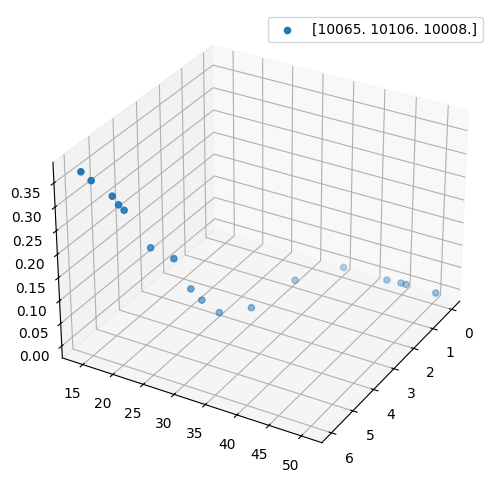

In [9]:
agamo.start_optimize(thread=True)
res=agamo.get_results()
while not res.get('stop_flag', False):
    res=agamo.get_results()
    front_eval = res.get('front_eval', None)
    if (front_eval is not None) and len(front_eval)>0:
        ax = plt.figure('Front Pareto', figsize=(6, 6)).add_subplot(111, projection='3d')
        ax.grid(True)
        ax.view_init(30, 30)
        ax.scatter(front_eval[:, 0], front_eval[:, 1], front_eval[:, 2], marker='o', label=res['evaluations']+res['evaluations_m'])
        plt.legend()
        plt.show()
    time.sleep(1)
    #print(res.get('iterations', 'brak'))
agamo.close()

In [10]:
res

{'stop_flag': True,
 'front': array([[16.7183143 , 13.94223552, 50.49147133, 33.31637344],
        [17.7525661 , 14.19634187, 37.7741367 , 45.64726248],
        [12.52694774, 18.60969573, 44.85413213, 37.63365925],
        [12.52694774, 18.06886609, 42.66803022, 37.63365925],
        [12.4308977 , 14.19634187, 35.48235684, 33.04798633],
        [12.4308977 , 12.80700423, 31.06847473, 29.39693991],
        [12.4308977 , 14.19634187, 23.51698128, 29.39693991],
        [12.52694774, 14.19634187, 25.35773461, 26.09386533],
        [12.83309954, 12.16565189, 19.83547461, 24.56509051],
        [12.4308977 , 14.19634187, 23.51698128, 20.76964688],
        [15.12707254, 13.49459021, 19.83547461, 23.25060619],
        [14.21682394, 12.47984541, 19.83547461, 19.25207901],
        [15.23611759, 14.19634187, 18.53100367, 17.29124698],
        [15.55270537, 14.19634187, 17.69421459, 18.01997462],
        [12.52694774, 14.19634187, 17.69421459, 12.53238886],
        [12.52694774, 12.52694932, 15.244